In [1]:
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import uproot
import os

timestamps = {}
for station in os.listdir('/cr/tempdata01/filip/iRODS/UubRandoms/converted/timestamps'):
    
    start, stop = np.inf, -np.inf
    for file in np.loadtxt(f"/cr/tempdata01/filip/iRODS/UubRandoms/converted/timestamps/{station}", usecols=[1, 2]):
        if file[0] < start: start = file[0]
        if file[1] > stop: stop = file[1]
    
    timestamps[station[:-4]] = (start, stop)

StationIDs = set({'NuriaJr' : 56, 'Peru' : 1737, 'Granada' : 1738, 'Jaco' : 1742, 'LeQuiDon' : 1744, 'RukaMalen' : -1, 'Svenja' : 1733}.values())

print(StationIDs)

{1733, 1737, 1738, 1742, 1744, 56, -1}


# Looking at the production data (= recostructed events)

In [2]:
# Find out if tanks in question participated in any events
for day in [14, 15, 16, 17]:
    file = uproot.open(f"/cr/tempdata01/filip/iRODS/MonitoringData/SD_2022_11_{day}_adst.root")
    for i, event in enumerate(file["recData/event./event.fSDEvent/event.fSDEvent.fStations/event.fSDEvent.fStations.fId"].array()):
        if set(event).intersection(StationIDs): print(event)

Start: 2022-11-15 16:51:50
Stop : 2022-11-16 18:30:32


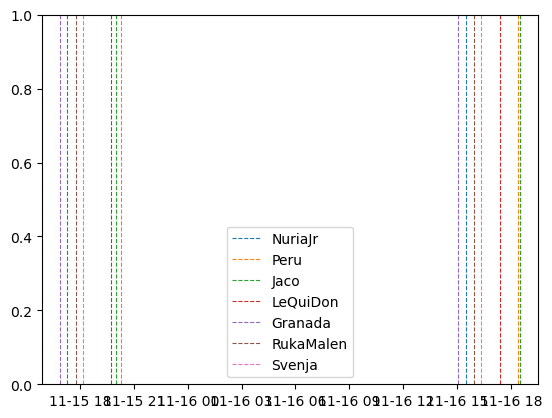

In [3]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (station, (start, stop)) in enumerate(timestamps.items()):
    plt.axvline(dt.datetime.fromtimestamp(start), ls = '--', lw = 0.8, color = cycle[i], label=station)
    plt.axvline(dt.datetime.fromtimestamp(stop), ls = '--', lw = 0.8, color = cycle[i])

print("Start:", dt.datetime.fromtimestamp(min([i[0] for i in timestamps.values()])))
print("Stop :", dt.datetime.fromtimestamp(max([i[1] for i in timestamps.values()])))

_ = plt.xlim(dt.datetime.fromtimestamp(min([i[0] for i in timestamps.values()]) - 3600), dt.datetime.fromtimestamp(max([i[1] for i in timestamps.values()]) + 3600))

plt.legend()

# Looking at all T3s, maybe something is appearing there?

In [9]:
# Find out if tanks in question participated in any events
for day in [15, 16]:
    file = uproot.open(f"/cr/tempdata01/filip/iRODS/MonitoringData/ad_2022_11_{day}_12h00.root")

    for item in file.keys():
        if 'Sd-only' in item:
            print(file[item])
    
    #for key, val in file.items():
    #    print(val)

    #for i, event in enumerate(file["recData/event./event.fSDEvent/event.fSDEvent.fStations/event.fSDEvent.fStations.fId"].array()):
    #   if set(event).intersection(StationIDs): print(event)

    break

NotImplementedError: memberwise serialization of AsVector(IoSdStation)
    in file /cr/tempdata01/filip/iRODS/MonitoringData/ad_2022_11_15_12h00.root